# Exploratory Analysis of Olist dataset

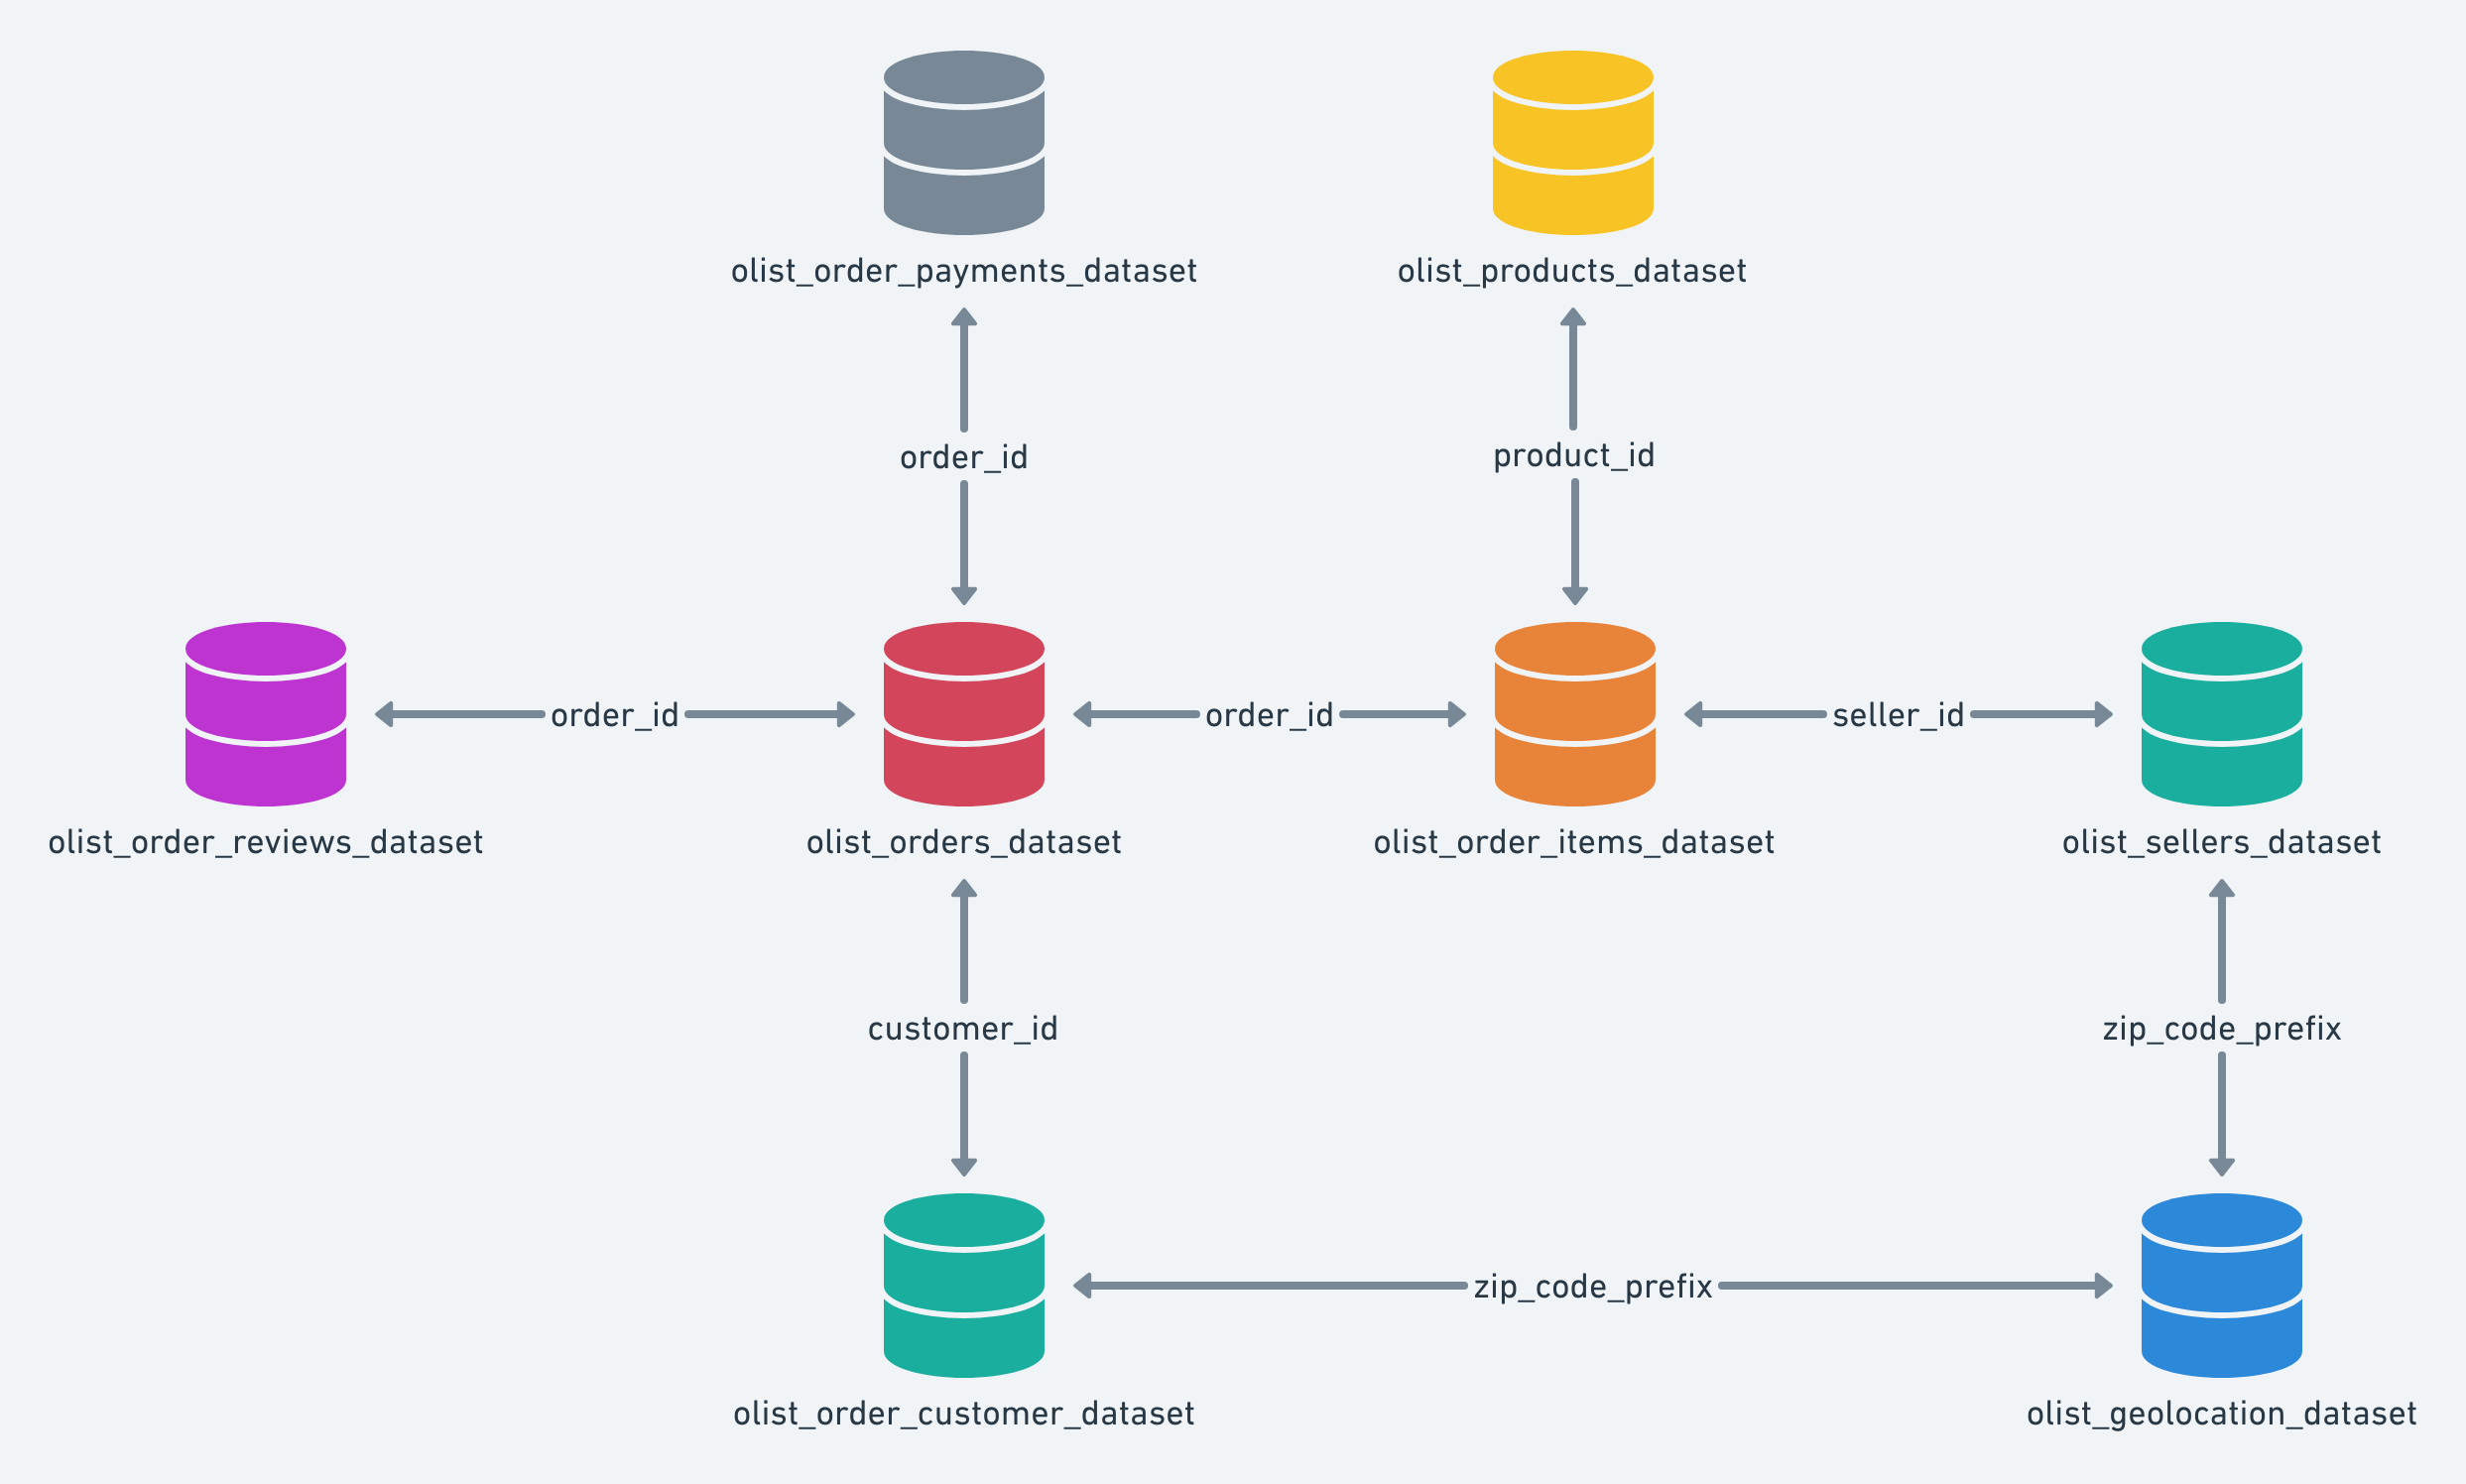

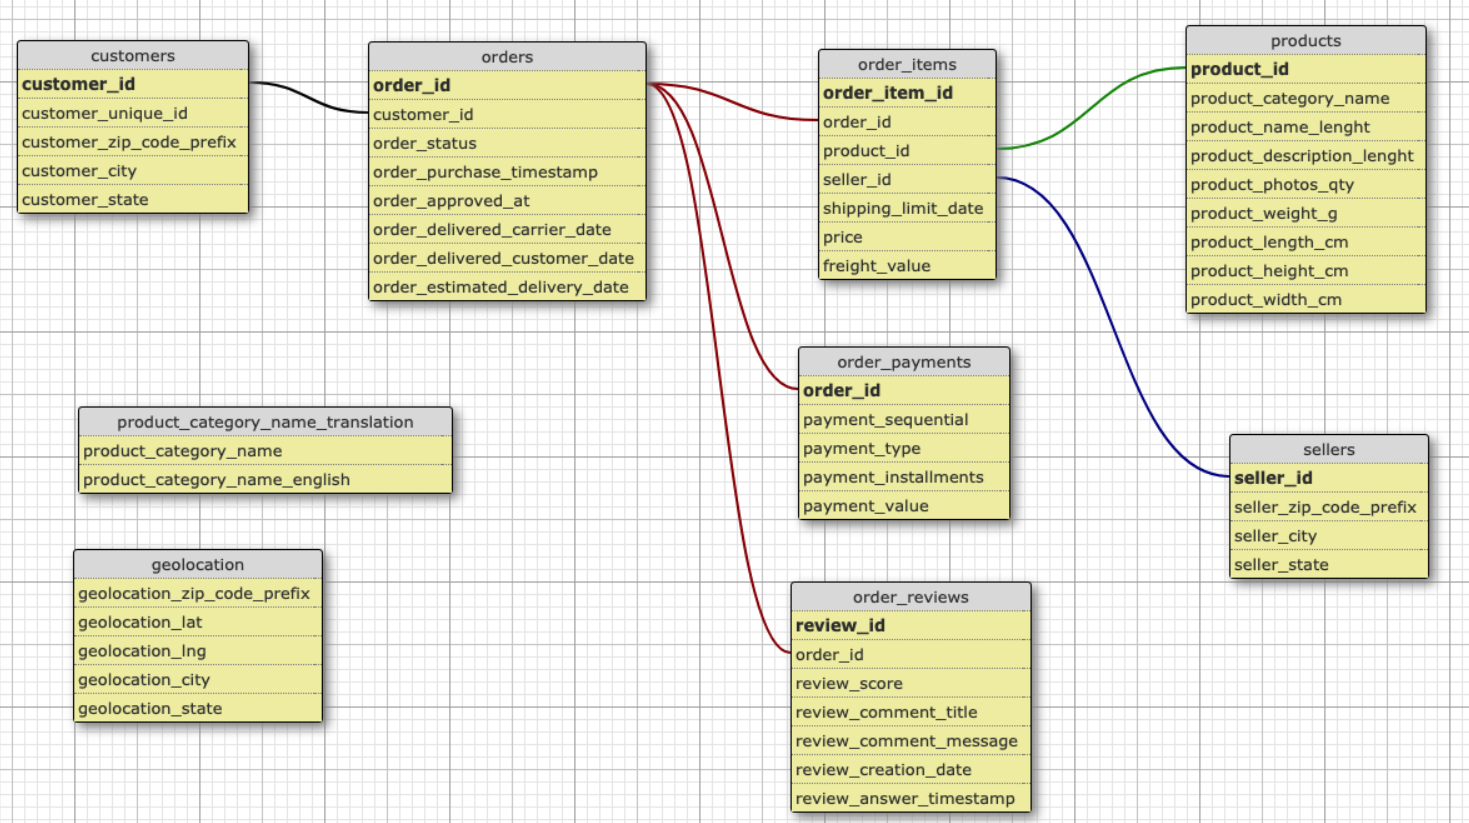

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

from olistpackage.data import Olist

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Instantiate the Olist class 
# which main purpose is downloading Olist csv files.
olist = Olist()

In [3]:
# Download Olist csv files in root/data/csv folder.
# If all the csv files exists already, do nothing.
# Uses the Kaggle Official API for donwloading Olist csv files.
# Kaggle Official API credentials are asked by opendatasets.download().
# Sign in to https://kaggle.com/, then click on your profile picture
# on the top right and select "My Account" from the menu.
# Scroll down to the "API" section and click "Create New API Token".
# This will download a file kaggle.json with the following contents:
# {"username":"YOUR_KAGGLE_USERNAME","key":"YOUR_KAGGLE_KEY"}

olist.download_data()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dialectique
Your Kaggle Key: ········


100%|█████████████████████████| 42.6M/42.6M [00:14<00:00, 3.19MB/s]



The Olist csv files are downloaded.


In [4]:
# get the Olist csv files data into a dictionary of dataframes
data = olist.get_data()

Each transaction on the Olist ecommerce platform is characterized by:
- a `customer_id`, that would buy...
- various`product_id`...
- to a `seller_id`...
- and leaves a `rewiew_id`...
- all this belonging to an `order_id`

## 1 - Run an automated exploratory analysis with [SweetViz](https://pypi.org/project/sweetviz/)

The reports are stored in the project-root/data/reports directory

In [5]:
datasets_to_profile = ['orders', 'products', 'sellers',
                  'customers', 'order_reviews',
                  'order_items']

In [6]:
for d in datasets_to_profile:
    print('exporting: '+d)
    path = os.path.join("..", "data", "reports", d+".html")
    analyze_report = sv.analyze(data['orders'])
    analyze_report.show_html(path, open_browser=False)

exporting: orders


                                             | | [  0%]   00:00 -> 

Report ../data/reports/orders.html was generated.
exporting: products


                                             | | [  0%]   00:00 -> 

Report ../data/reports/products.html was generated.
exporting: sellers


                                             | | [  0%]   00:00 -> 

Report ../data/reports/sellers.html was generated.
exporting: customers


                                             | | [  0%]   00:00 -> 

Report ../data/reports/customers.html was generated.
exporting: order_reviews


                                             | | [  0%]   00:00 -> 

Report ../data/reports/order_reviews.html was generated.
exporting: order_items


                                             | | [  0%]   00:00 -> 

Report ../data/reports/order_items.html was generated.


## 2 - Investigate the cardinalities of the various DataFrames

### 2.1 - Nunique, count and ratio

In [7]:
index_label = [
    'orders',
    'products',
    'sellers',
    'customers',
    'order_reviews',
    'order_items',
    'order_items',
    'products'
]

data_count = pd.Series([
data['orders'].order_id.count(),
data['products'].product_id.count(),
data['sellers'].seller_id.count(),
data['customers'].customer_id.count(),
data['order_reviews'].order_id.count(),
data['order_items'].order_id.count(),
data['order_items'].product_id.count(),
data['products'].product_id.count()
], dtype=int, index=index_label)

data_nunique = pd.Series([
data['orders'].order_id.nunique(),
data['products'].product_id.nunique(),
data['sellers'].seller_id.nunique(),
data['customers'].customer_id.nunique(),
data['order_reviews'].review_id.nunique(),
data['order_items'].order_id.nunique(),
data['order_items'].product_id.nunique(),
data['products'].product_id.nunique()
], dtype=int, index=index_label)

ratio = (data_nunique / data_count).round(2)

cardinalities = pd.concat([data_nunique, data_count, ratio], axis=1).convert_dtypes().transpose()
cardinalities.rename(index={0: 'nunique', 1: 'count', 2: 'ratio'}, inplace=True)

cardinalities

,orders,products,sellers,customers,order_reviews,order_items,order_items,products
nunique,99441,32951,3095,99441,98410,98666,32951,32951
count,99441,32951,3095,99441,99224,112650,112650,32951
ratio,1.0,1.0,1.0,1.0,0.99,0.88,0.29,1.0


### 2.2 - Number of reviews per order

In [8]:
merged_tables = data['orders'].merge(data['order_reviews'], on='order_id', how='outer')
number_of_reviews = merged_tables[['order_id', 'review_id']].groupby(by='order_id').count().rename(columns={'review_id': 'Number_of_reviews'})
number_of_reviews.head()

,Number_of_reviews
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
00018f77f2f0320c557190d7a144bdd3,1
000229ec398224ef6ca0657da4fc703e,1
00024acbcdf0a6daa1e931b038114c75,1
00042b26cf59d7ce69dfabb4e55b4fd9,1


In [9]:
number_of_reviews.agg([min, max])

,Number_of_reviews
min,0
max,3


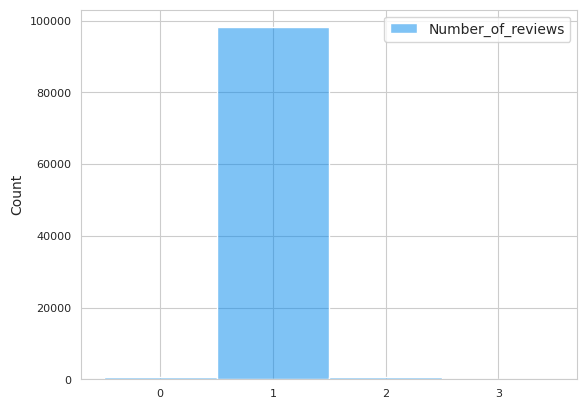

In [10]:
sns.set_style("whitegrid")
sns.histplot(number_of_reviews, discrete=True).set_xticks(range(0,4));

In [11]:
# Check missing reviews
merged_tables[['review_id']].isna().sum()

review_id    768
dtype: int64

Nearly all orders have a review, except 768 out of 100000 (less than 0.7% missing)